In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import colors
from matplotlib import ticker

%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

import warnings
warnings.filterwarnings("ignore")

In [22]:
def get_vars(dirname, depth_ind):
    fname = "1_MCKNZ_1h_20170101_20170120_*"
    y,x = slice(1,-1,None), slice(1,-1,None)
    time_ind = 13*24
    
    filesT = general_functions.get_files(dirname, fname, 'grid_T')
    filesU = general_functions.get_files(dirname, fname, 'grid_U') 
    filesW = general_functions.get_files(dirname, fname, 'grid_W')
            
    with scDataset(filesT) as dsT, scDataset(filesU) as dsU, scDataset(filesW) as dsW:
        deptht = dsT.variables['deptht'][:]
        sozotaux = dsU.variables['sozotaux'][:time_ind,0,0]        
        vovecrtz0 = dsW.variables['vovecrtz'][:time_ind,depth_ind,y,x]
        
    with nc.Dataset(os.path.join(dirname, '1_mesh_mask.nc'), 'r') as dsM:
        tmask0 = dsM.variables['tmask'][0,depth_ind,y,x]
        
    tmask = np.tile(tmask0, (len(sozotaux),1, 1))  
    vovecrtz = np.ma.array(vovecrtz0, mask=1 - tmask)
    
    return vovecrtz, tmask, sozotaux, deptht

In [26]:
def get_1day_avg(sal, day_start, day_end):
    day = slice(day_start*24, day_end*24, None)
    sal_day = np.mean(sal[day, ...], axis=0)
    return sal_day

In [27]:
def get_daily_w(vovecrtz, tmask):
    
    # get daily vovecrtz averages from hourly results
    vovecrtz_daily0 = np.full((vovecrtz.shape[-3]/24, vovecrtz.shape[-2], vovecrtz.shape[-1]), np.nan)
    for i in range(vovecrtz_daily0.shape[0]):
        day_start, day_end = i, i+1
        vovecrtz_daily0[i, :, :] = get_1day_avg(vovecrtz, day_start, day_end)

    tmask_new = np.tile(tmask[0, :, :], (vovecrtz_daily0.shape[0], 1, 1))
    vovecrtz_daily = np.ma.array(vovecrtz_daily0, mask=1 - tmask_new)

    print(type(vovecrtz_daily0), vovecrtz_daily0.shape, tmask_new.shape, vovecrtz_daily.shape, type(vovecrtz_daily))
    
    return vovecrtz_daily, tmask_new

In [47]:
def pcolor_story_panels(plot_array, cmap, norm, vmin, vmax, title, cblabel):
    
    fig, axes = plt.subplots(3, 4, figsize = (20, 20))
    for ax, n in zip(axes.flatten(), np.arange(12)):  
        p = ax.pcolormesh(plot_array[n, :, :], cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_aspect(aspect='equal')
        ax.set_xlim([0, plot_array.shape[-1]])
        ax.set_ylim([0, plot_array.shape[-2]])
        ax.set_title('Day ' + str(n+1), fontsize=20)
        ax.axvline(130, c='k')
        ax.axhline(60, c='k')
        if n == 0:
            cbar = fig.colorbar(p, ax=ax, fraction=0.05, orientation='horizontal', pad=0.009)
            cbar.set_label(cblabel, fontsize=18, rotation=0, labelpad=2.5)
            cbar.ax.tick_params(labelsize=13)
            tick_locator = ticker.MaxNLocator(nbins=5)
            cbar.locator = tick_locator
            cbar.update_ticks()
        else:
            pass
    fig.tight_layout(w_pad=1.2, h_pad=0.01)
    fig.suptitle(title + ' [Depth = '+str(int(deptht[dep_ind]))+' m]', fontsize=25)
    plt.subplots_adjust(top=0.95)

    return fig

# Depth index

In [23]:
dep_ind = 9

# Ideal_half

In [54]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_half_flt/'
vovecrtz, tmask, sozotaux, deptht = get_vars(dirname, dep_ind)

vovecrtz_daily, tmask_new = get_daily_w(vovecrtz, tmask)

<class 'numpy.ndarray'> (13, 272, 242) (13, 272, 242) (13, 272, 242) <class 'numpy.ma.core.MaskedArray'>


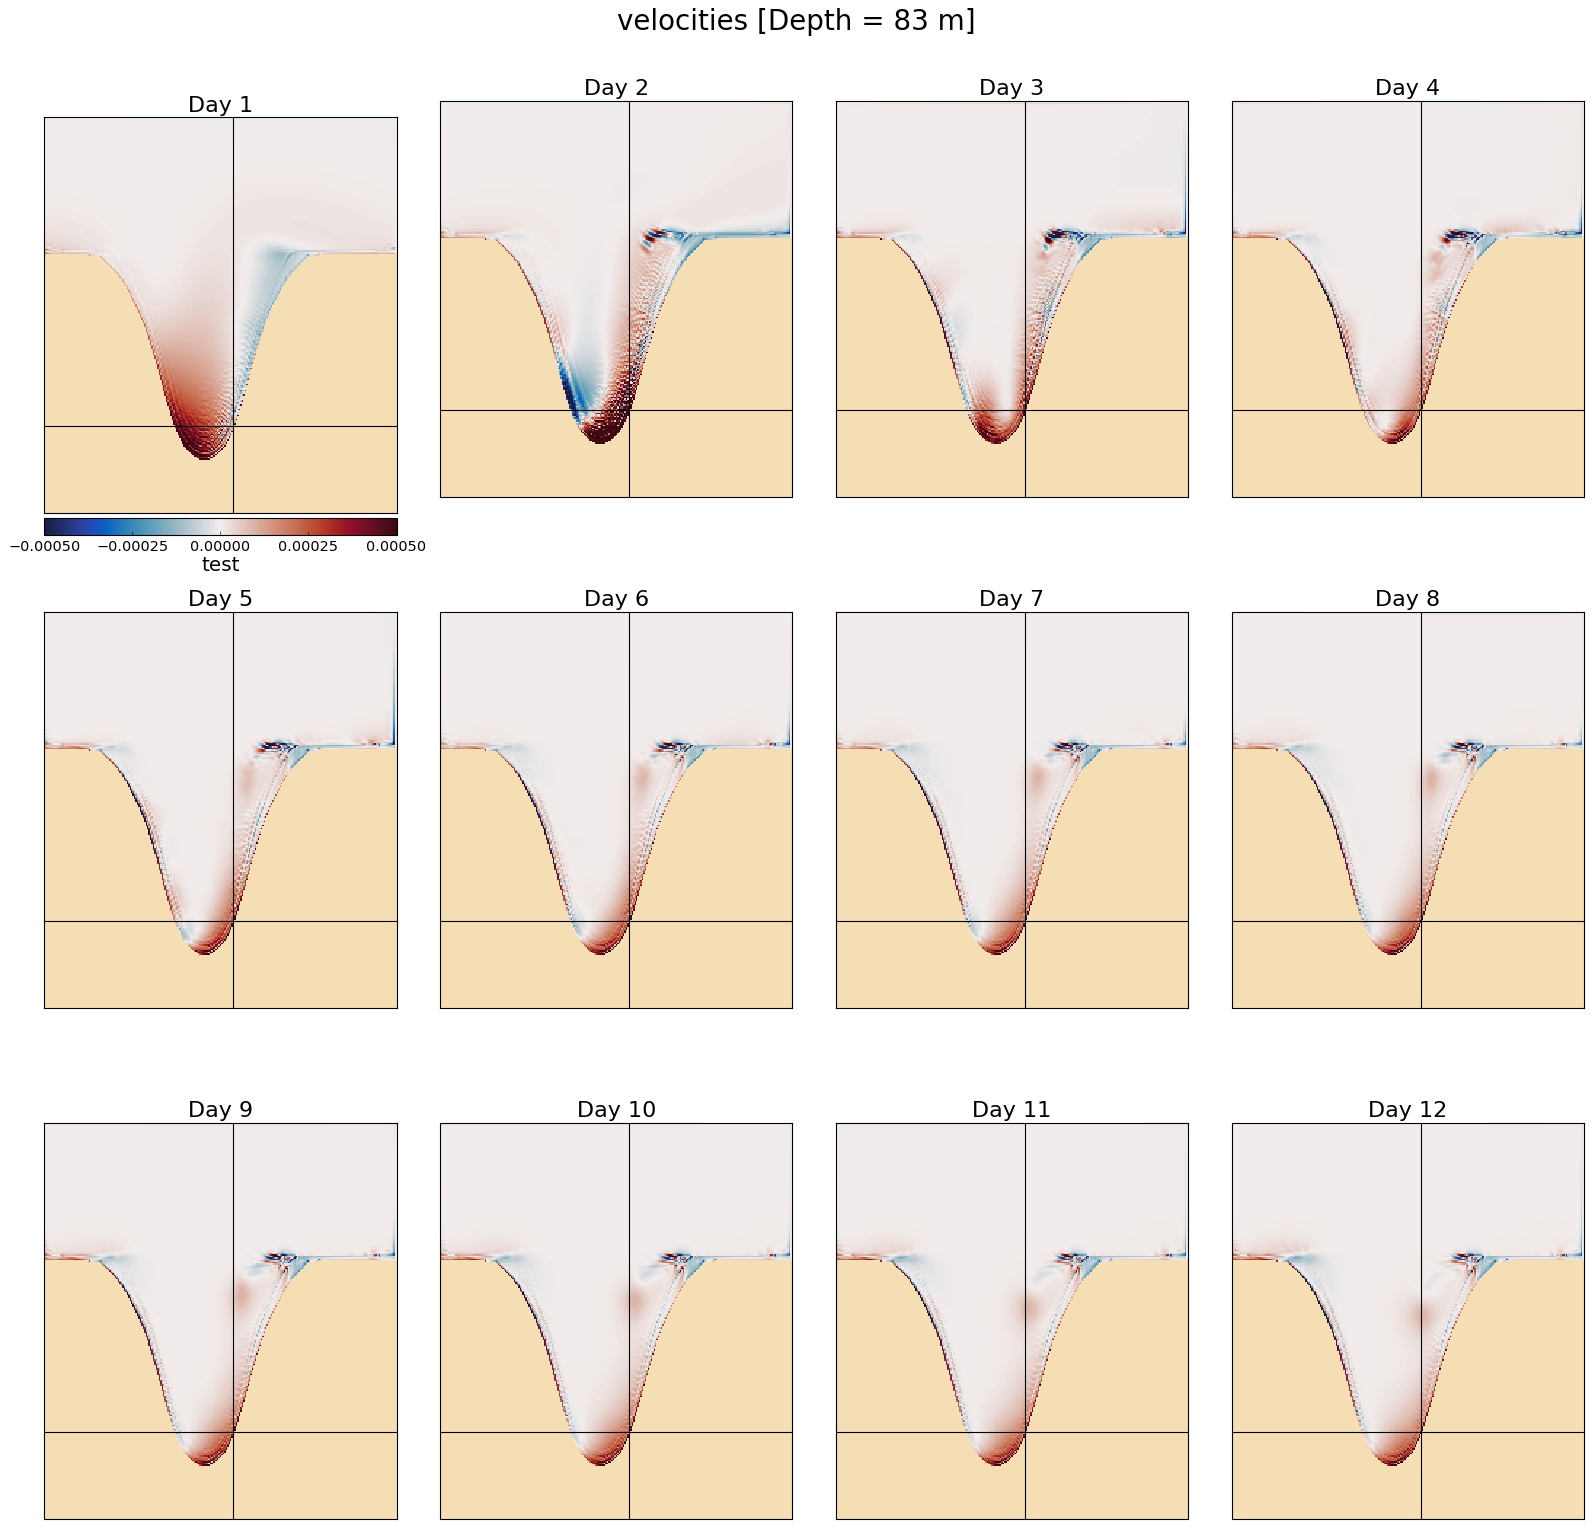

In [55]:
plot_array = vovecrtz_daily
cmap, norm = cmo.cm.balance, None
cmap.set_bad('wheat')
vmin, vmax = -0.0005, 0.0005
title, cblabel = 'velocities', 'test'
fig = pcolor_story_panels(plot_array, cmap, norm, vmin, vmax, title, cblabel)

# Ideal_base

In [34]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_base_flt/'
vovecrtz, tmask, sozotaux, deptht = get_vars(dirname, dep_ind)

vovecrtz_daily, tmask_new = get_daily_w(vovecrtz, tmask)

<class 'numpy.ndarray'> (13, 272, 242) (13, 272, 242) (13, 272, 242) <class 'numpy.ma.core.MaskedArray'>


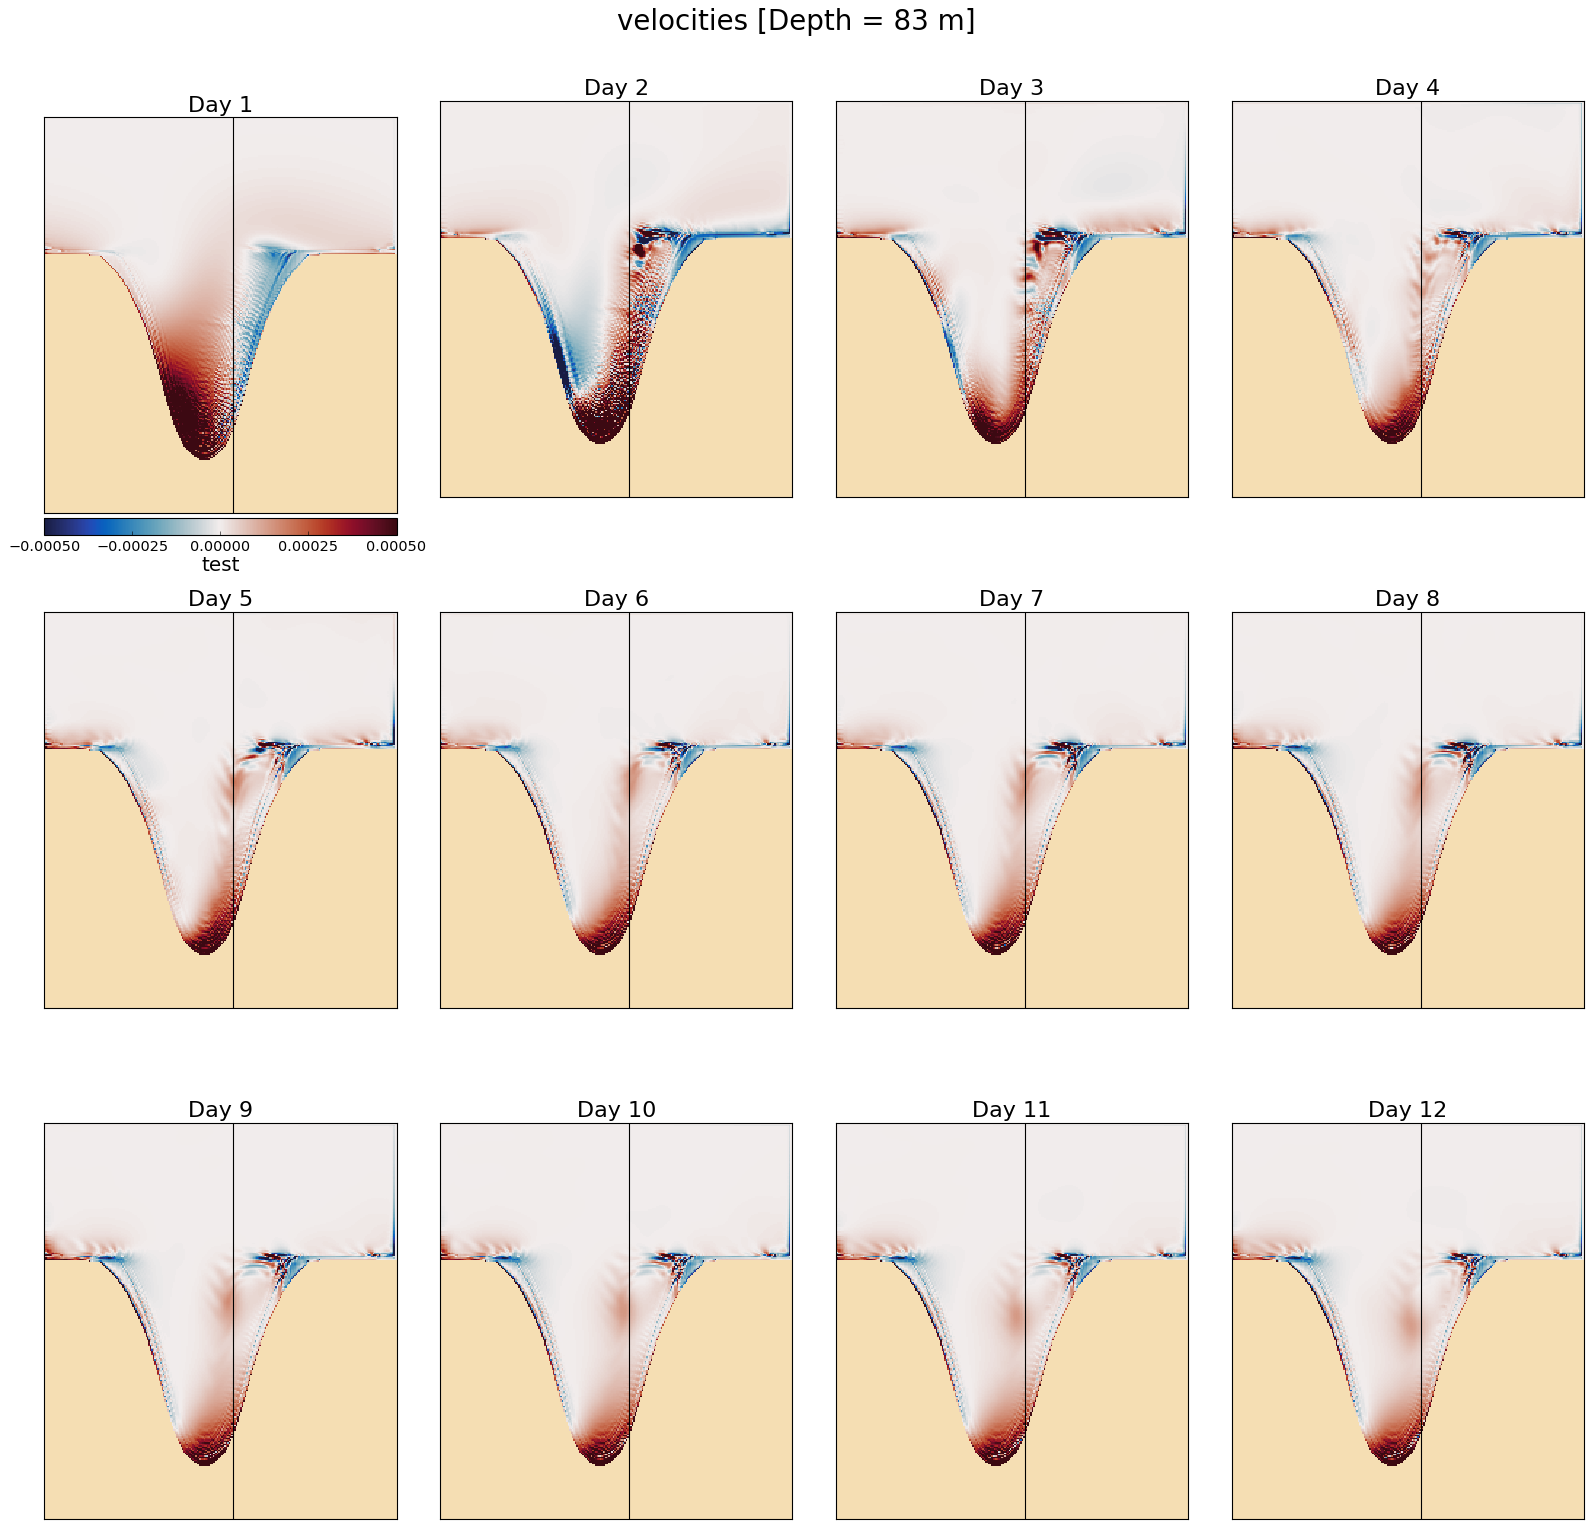

In [35]:
plot_array = vovecrtz_daily
cmap, norm = cmo.cm.balance, None
cmap.set_bad('wheat')
vmin, vmax = -0.0005, 0.0005
title, cblabel = 'velocities', 'test'
fig = pcolor_story_panels(plot_array, cmap, norm, vmin, vmax, title, cblabel)

# Ideal_double

In [36]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_double_flt/'
vovecrtz, tmask, sozotaux, deptht = get_vars(dirname, dep_ind)

vovecrtz_daily, tmask_new = get_daily_w(vovecrtz, tmask)

<class 'numpy.ndarray'> (13, 272, 242) (13, 272, 242) (13, 272, 242) <class 'numpy.ma.core.MaskedArray'>


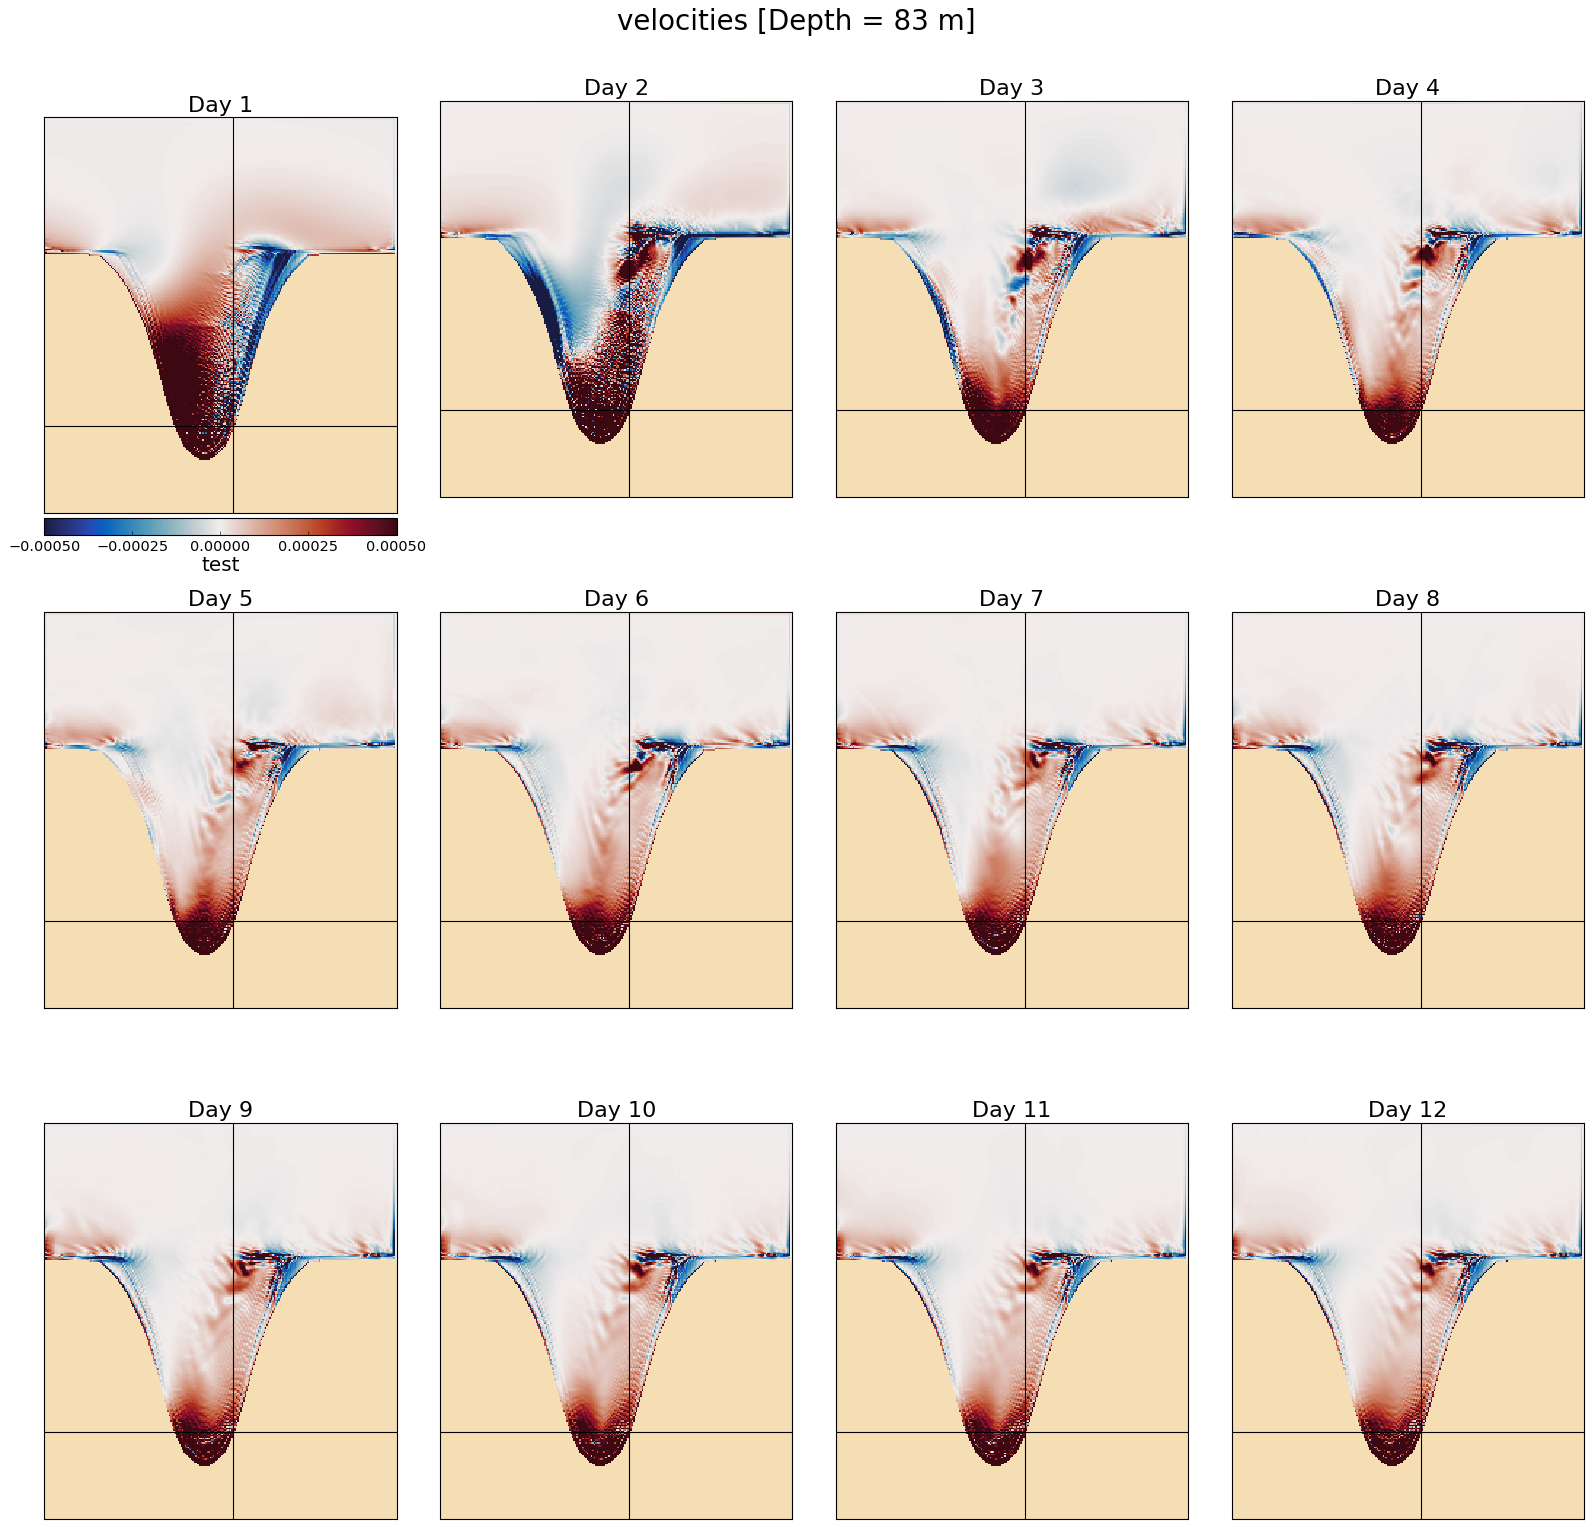

In [48]:
plot_array = vovecrtz_daily
cmap, norm = cmo.cm.balance, None
cmap.set_bad('wheat')
vmin, vmax = -0.0005, 0.0005
title, cblabel = 'velocities', 'test'
fig = pcolor_story_panels(plot_array, cmap, norm, vmin, vmax, title, cblabel)